In [71]:
import PIL
from PIL import Image
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import boto3
import shutil

In [72]:
# !mkdir train_resize
# !mkdir valid_resize
unique_chars = ['non-melanoma', 'melanoma']
im = Image.open(r"./train_processed/melanoma/0101_1.jpg")  
  
im.show() 

(200, 200, 3)
(3, 200, 200)


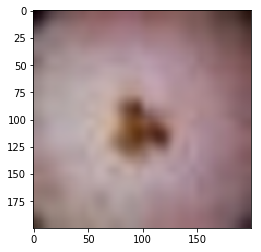

In [73]:
def prepare(filepath, IMG_SIZE):
    img_array = cv2.imread(filepath) 
    res = cv2.resize(img_array, dsize=(IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    res = cv2.cvtColor(res, cv2.COLOR_BGR2RGB)
#     return np.reshape(res, (3, IMG_SIZE, IMG_SIZE))
    return res

def prepare2(filepath, IMG_SIZE):
    img_array = cv2.imread(filepath)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE)

image_data = prepare(('./train_processed/melanoma/0101_1.jpg') , 200)
image = Image.fromarray(image_data)
image.save('./0101_1.jpg')
plt.imshow(image)
print(image_data.shape)
image_data2 = prepare2(('./train_processed/melanoma/0101_1.jpg') , 200)
print(image_data2.shape)

In [74]:
index = 0
for chars in unique_chars:
    for filename in os.listdir("./train_processed/" + chars):
        destination = './train_resize/'+ chars + "/" + filename
        
        print(filename + " " + chars)
        
        if (filename == ".ipynb_checkpoints"):
            continue
        else:
            image_data = prepare(('./train_processed/' + chars + "/" + filename) , 100)
            image = Image.fromarray(image_data)
            try:
                image.save('./train_resize/' + chars + "/" + filename)
            except:
                os.mkdir('train_resize/'+chars)
                image.save('./train_resize/' + chars + "/" + filename)

1145_0.jpg non-melanoma
1100_0.jpg non-melanoma
0145_0.jpg non-melanoma
0100_0.jpg non-melanoma
4156_0.jpg non-melanoma
320_0.jpg non-melanoma
358_0.jpg non-melanoma
430_0.jpg non-melanoma
475_0.jpg non-melanoma
1178_0.jpg non-melanoma
0178_0.jpg non-melanoma
381_0.jpg non-melanoma
414_0.jpg non-melanoma
451_0.jpg non-melanoma
9_01.jpg non-melanoma
339_0.jpg non-melanoma
1119_0.jpg non-melanoma
0119_0.jpg non-melanoma
1124_0.jpg non-melanoma
0124_0.jpg non-melanoma
186_01.jpg non-melanoma
4172_0.jpg non-melanoma
198_01.jpg non-melanoma
491_0.jpg non-melanoma
493_0.jpg non-melanoma
4170_0.jpg non-melanoma
4135_0.jpg non-melanoma
453_0.jpg non-melanoma
120_01.jpg non-melanoma
143_01.jpg non-melanoma
57_01.jpg non-melanoma
34_01.jpg non-melanoma
29_0.jpg non-melanoma
1147_0.jpg non-melanoma
1102_0.jpg non-melanoma
0147_0.jpg non-melanoma
0102_0.jpg non-melanoma
167_01.jpg non-melanoma
322_0.jpg non-melanoma
367_0.jpg non-melanoma
0183_0.jpg non-melanoma
1183_0.jpg non-melanoma
122_01.jpg 

492_1.jpg melanoma
163_11.jpg melanoma
083_1.jpg melanoma
452_1.jpg melanoma
41_11.jpg melanoma
450_1.jpg melanoma
88_11.jpg melanoma
33_1.jpg melanoma
0118_1.jpg melanoma
1118_1.jpg melanoma
0160_1.jpg melanoma
1160_1.jpg melanoma
041_1.jpg melanoma
0101_1.jpg melanoma
1101_1.jpg melanoma
449_1.jpg melanoma
098_1.jpg melanoma
065_1.jpg melanoma
489_1.jpg melanoma
474_1.jpg melanoma
0179_1.jpg melanoma
1179_1.jpg melanoma
1184_1.jpg melanoma
182_11.jpg melanoma
0184_1.jpg melanoma
98_11.jpg melanoma
0140_1.jpg melanoma
1140_1.jpg melanoma
2137_1.jpg melanoma
3137_1.jpg melanoma
13_1.jpg melanoma
1180_1.jpg melanoma
141_1.jpg melanoma
0180_1.jpg melanoma
0138_1.jpg melanoma
1138_1.jpg melanoma
470_1.jpg melanoma
94_11.jpg melanoma
435_1.jpg melanoma
3196_1.jpg melanoma
2196_1.jpg melanoma
198_1.jpg melanoma
180_11.jpg melanoma
165_1.jpg melanoma
3_11.jpg melanoma
454_1.jpg melanoma
469_1.jpg melanoma
494_1.jpg melanoma
2113_1.jpg melanoma
3113_1.jpg melanoma
0164_1.jpg melanoma
1164_1.j

In [75]:
# shutil.rmtree('./train_resize/anger')

In [76]:
for chars in unique_chars:
    for filename in os.listdir("./valid_processed/" + chars):
        destination = './valid_resize/'+ chars + "/" + filename
        
        print(filename + " " + chars)
        
        if (filename == ".ipynb_checkpoints"):
            continue
        else:
            image_data = prepare(('./valid_processed/' + chars + "/" + filename) , 100)
            image = Image.fromarray(image_data)
            try:
                image.save('./valid_resize/' + chars + "/" + filename)
            except:
                os.mkdir('valid_resize/'+chars)
                image.save('./valid_resize/' + chars + "/" + filename)

278_0.jpg non-melanoma
179_0.jpg non-melanoma
3132_0.jpg non-melanoma
285_0.jpg non-melanoma
2132_0.jpg non-melanoma
021_0.jpg non-melanoma
099_0.jpg non-melanoma
144_0.jpg non-melanoma
245_0.jpg non-melanoma
038_0.jpg non-melanoma
194_01.jpg non-melanoma
261_0.jpg non-melanoma
2193_0.jpg non-melanoma
3193_0.jpg non-melanoma
32_0.jpg non-melanoma
160_0.jpg non-melanoma
219_0.jpg non-melanoma
5_01.jpg non-melanoma
132_01.jpg non-melanoma
343_0.jpg non-melanoma
61_01.jpg non-melanoma
162_0.jpg non-melanoma
127_0.jpg non-melanoma
3129_0.jpg non-melanoma
2129_0.jpg non-melanoma
30_0.jpg non-melanoma
2191_0.jpg non-melanoma
3191_0.jpg non-melanoma
4194_0.jpg non-melanoma
4169_0.jpg non-melanoma
175_01.jpg non-melanoma
247_0.jpg non-melanoma
3130_0.jpg non-melanoma
3175_0.jpg non-melanoma
287_0.jpg non-melanoma
2130_0.jpg non-melanoma
2175_0.jpg non-melanoma
38_01.jpg non-melanoma
186_0.jpg non-melanoma
45_01.jpg non-melanoma
4154_0.jpg non-melanoma
066_0.jpg non-melanoma
10_0.jpg non-melano

04_1.jpg melanoma
06_1.jpg melanoma
1168_1.jpg melanoma
0168_1.jpg melanoma
1110_1.jpg melanoma
0110_1.jpg melanoma
1171_1.jpg melanoma
1134_1.jpg melanoma
189_11.jpg melanoma
0171_1.jpg melanoma
0134_1.jpg melanoma
6_11.jpg melanoma
1109_1.jpg melanoma
0109_1.jpg melanoma
0188_1.jpg melanoma
1188_1.jpg melanoma
26_1.jpg melanoma
1148_1.jpg melanoma
0148_1.jpg melanoma
47_1.jpg melanoma
424_1.jpg melanoma
4_11.jpg melanoma
1151_1.jpg melanoma
1114_1.jpg melanoma
0151_1.jpg melanoma
0114_1.jpg melanoma
1153_1.jpg melanoma
1116_1.jpg melanoma
0153_1.jpg melanoma
0116_1.jpg melanoma
426_1.jpg melanoma
463_1.jpg melanoma
24_1.jpg melanoma
117_11.jpg melanoma
174_11.jpg melanoma
1177_1.jpg melanoma
109_11.jpg melanoma
0177_1.jpg melanoma
459_1.jpg melanoma
07_1.jpg melanoma
464_1.jpg melanoma
440_1.jpg melanoma
480_1.jpg melanoma
482_1.jpg melanoma
21_1.jpg melanoma
40_11.jpg melanoma
442_1.jpg melanoma
23_11.jpg melanoma
423_1.jpg melanoma
64_11.jpg melanoma
42_11.jpg melanoma
01_1.jpg mel

In [77]:
# for emotions in unique_emotions:
# #     if (emotions != "anger"):
#         shutil.rmtree("./train_resize/" + emotions)
#         shutil.rmtree("./valid_resize/" + emotions)

In [78]:
for chars in unique_chars:
    counter = 0
    for filename in os.listdir("./valid_resize/" + chars):
        counter += 1
#         if (counter % 100 == 
    print (chars + " " + str(counter))

non-melanoma 252
melanoma 228


In [79]:
for chars in unique_chars:
    counter = 0
    for filename in os.listdir("./train_resize/" + chars):
        counter += 1
#         if (counter % 100 == 
    print (chars + " " + str(counter))

non-melanoma 348
melanoma 372


In [1]:
# !mkdir test_resize

In [6]:
for filename in os.listdir("./facial_expressions/test/"):
    destination = './test_resize/' + filename

    print(filename)

    if (filename == ".ipynb_checkpoints"):
        continue
    else:
        image_data = prepare(('./facial_expressions/test/' + filename) , 50)
        image = Image.fromarray(image_data[0])
        image.save("./test_resize/" + filename)

140a.jpg
y36.jpg
y08.jpg
52b.jpg
KM.AN2.18.jpg
KajolAggarwal_99.jpg
Prema_16.jpg
Katrinakaif_32.jpg
FaridaJalal_63.jpg
y19.jpg
KR.NE2.72.jpg
BhanuPriya_15.jpg
Dileep_60.jpg
9a.jpg
110b.jpg
NTR_142.jpg
RamyaKrishna_71.jpg
KajalAgarwal_41.jpg
KajalAgarwal_20.jpg
77a.jpg
38a.jpg
TM.FE2.197.jpg
RimiSen_132.jpg
Prema_224.jpg
Dileep_65.jpg
KM.SU2.15.jpg
Brahamanandam_73.jpg
y37.jpg
JayaBhaduri_10.jpg
y07.jpg
72a.jpg
KA.AN2.40.jpg
KM.FE2.24.jpg
y23.jpg
KL.HA2.159.jpg
Innocent_26.jpg
FaridaJalal_77.jpg
138b.jpg
UY.NE2.135.jpg
200b.jpg
y29.jpg
y15.jpg
63a.jpg
KL.SA2.162.jpg
RimiSen_179.jpg
YM.AN2.62.jpg
TM.SA2.185.jpg
y12.jpg
Brahamanandam_77.jpg
108a.jpg
Irani_37.jpg
RamyaKrishna_53.jpg
Brahmanandam_24.jpg
180b.jpg
Prema_89.jpg
FaridaJalal_2.jpg
RimiSen_40.jpg
24b.jpg
FaridaJalal_69.jpg
141b.jpg
RamyaKrishna_23.jpg
KL.NE2.156.jpg
JayaBhaduri_51.jpg
YM.NE2.50.jpg
RimiSen_118.jpg
NM.AN2.105.jpg
136b.jpg
FaridaJalal_315.jpg
BhanuPriya_59.jpg
TM.NE2.178.jpg
y20.jpg
55b.jpg
y10.jpg
FaridaJalal_4.jp